# Boston_Housing - Regression Analysis

* Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

* GPU 설정 OFF

In [3]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [4]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

* CRIM: 범죄 발생률
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비소매 상업 지역 비율
* CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주 목적 방 개수
* AGE: 1940년 이전 건축된 주택 비율
* DIS: 보스턴 5대 고용지역까지 거리
* RAD: 고속도로 접근성
* TAX: 10,000달러당 재산세율
* PTRATIO: 교사와 학생 수 비율
* B: 흑인 거주 비율
* LSTAT: 하위 계층 비율
* PRICE: 주택 가격 -> 'y'

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

* train_data & test_data

In [6]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
X_train = X_train - mean
X_train = X_train / std
X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [9]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [10]:
boston.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

> ## 3) Model Fit

* 약 8분

In [11]:
%%time
Hist_boston = boston.fit(X_train, y_train, epochs = 500, batch_size = 1, validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 2s 4ms/step - loss: 184.6384 - mae: 10.0458 - val_loss: 57.2331 - val_mae: 4.3328
Epoch 2/500
323/323 [==============================] - 1s 3ms/step - loss: 29.3755 - mae: 3.6847 - val_loss: 36.7939 - val_mae: 3.3871
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 21.3066 - mae: 3.0817 - val_loss: 29.8555 - val_mae: 2.7919
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 17.7868 - mae: 2.8295 - val_loss: 26.1578 - val_mae: 3.0176
Epoch 5/500
323/323 [==============================] - 1s 2ms/step - loss: 15.3109 - mae: 2.6558 - val_loss: 20.6118 - val_mae: 2.6385
Epoch 6/500
323/323 [==============================] - 1s 2ms/step - loss: 14.2721 - mae: 2.4925 - val_loss: 22.4490 - val_mae: 2.7394
Epoch 7/500
323/323 [==============================] - 1s 2ms/step - loss: 13.5834 - mae: 2.4287 - val_loss: 19.3232 - val_mae: 2.4524
Epoch 8/500
323/323 [==============================] 

> ## 4) 학습 결과 시각화

* 전체 시각화

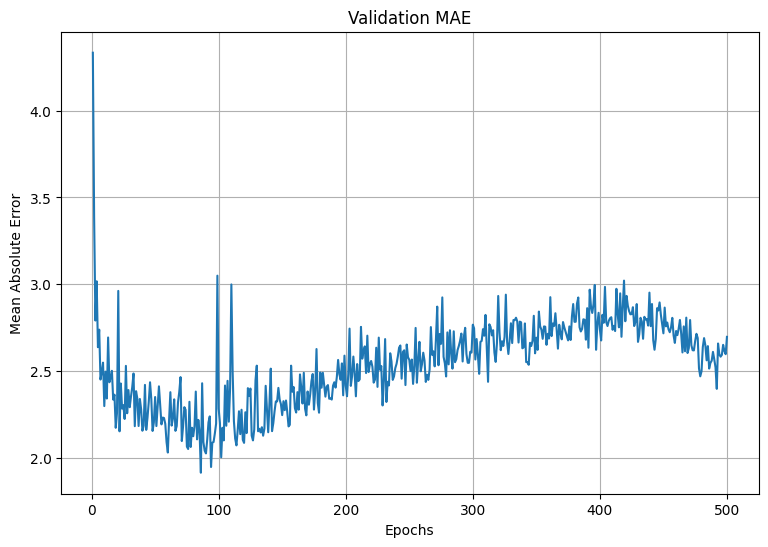

In [12]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_boston.history['val_mae']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

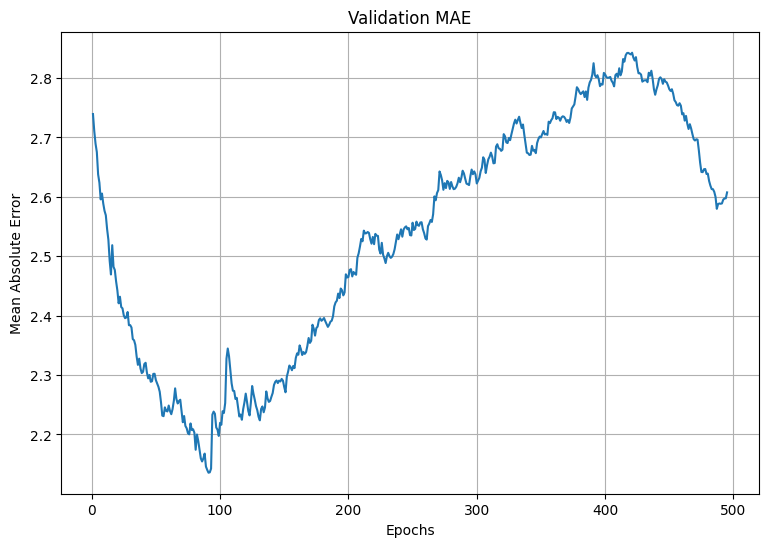

In [13]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [14]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)
print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 15.9318 - mae: 2.8309
MAE is : 2.8309125900268555


> ## 6) Keras Session Clear

In [15]:
from tensorflow.keras import backend as K
K.clear_session()

# IV. Callbacks( )

> ## 1) Model Define & Compile

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',optimizer = 'rmsprop',metrics = ['mae'])

> ## 2) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', mode = 'min', patience = 50, verbose = 1)

> ## 3) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', monitor = 'val_mae', mode = 'min', save_best_only = True, verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [19]:
%%time
Hist_boston = boston.fit(X_train, y_train, epochs = 500, 
                         batch_size = 1, validation_data = (X_valid, y_valid), 
                         callbacks = [es, mc], verbose = 1)

Epoch 1/500
319/323 [============================>.] - ETA: 0s - loss: 222.1326 - mae: 11.0373
Epoch 1: val_mae improved from inf to 5.05281, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 219.6648 - mae: 10.9518 - val_loss: 64.8520 - val_mae: 5.0528
Epoch 2/500
312/323 [===========================>..] - ETA: 0s - loss: 31.8041 - mae: 4.0918
Epoch 2: val_mae improved from 5.05281 to 3.29014, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 31.1217 - mae: 4.0517 - val_loss: 27.9856 - val_mae: 3.2901
Epoch 3/500
317/323 [============================>.] - ETA: 0s - loss: 20.9329 - mae: 3.2231
Epoch 3: val_mae improved from 3.29014 to 2.92748, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 20.7468 - mae: 3.2073 - val_loss: 24.2484 - val_mae: 2.9275
Epoch 4/500
307/323 [===========================>..] - ETA: 0s - loss: 17.3999 - mae: 2.8477
Epoch 4: val_

> ## 5) Best Model

In [20]:
!ls -l

total 72
-rw-r--r-- 1 root root 65840 Apr  3 01:28 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar 30 13:53 sample_data


> ## 6) Model Evaluate

In [21]:
from tensorflow.keras.models import load_model
best_boston = load_model('best_boston.h5')

In [22]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test, verbose = 0)
print('MAE is :',test_mae_score)

MAE is : 2.530710220336914
